<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/eywalker/Lviv-2021/blob/main/notebooks/Deep-Learning-in-Neuroscience.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/eywalker/Lviv-2021/blob/main/notebooks/Deep-Learning-in-Neuroscience.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Welcome to Deep Learning in Neuroscience by Edgar Y. Walker

This is a Jupyter notebook accompanying the course on "Deep Learning in Neuroscience", taught as part of the Lviv Data Science Summer School 2021. This notebook as well as any other relevant information can be found in the [GitHub repository](https://github.com/eywalker/lviv-2021)!

In this course, we will learn how deep learning is leveraged in neuroscience, specifically in building models of neuronal responses to complex sensory inputs such as natural images. We will start by going through some neuroscience primer in slides. We will then get our hands dirty by taking real neuronal responses recorded from mouse primary visual cortex (V1) as the mouse observes natural images, and developing models to predict these responses. By the end of this course, you will gain basic familiarity in developing deep learning models to predict responses of 1000s of neurons to natural images!


## Part 0: Preparing the environment

#### <font color='red'>NOTE: Please run this part at the very beginning of the first session!</font>

Before we get to dive in and learn how deep learning is used in neuroscience and get your first neural predictive model trained, we need to install some prerequisite packages and download some neuronal data!

### Getting the code

We are going to primarily use [PyTorch](https://pytorch.org) to build, train and evaluate our deep learning models (note - this tutorial assumes some familiarity with PyTorch already, the basics are not covered; if basics are unfamiliar, refer to the official [PyTorch Tutorials](https://pytorch.org/tutorials/)).

Furthermore, in order to handle the dataset containing neuronal activities, we are going to make our life easier by using a few existing libraries, collected under [Lviv-2021](https://github.com/eywalker/lviv-2021). This library has a dependency on [neuralpredictors](https://github.com/sinzlab/neuralpredictors), which is a collection of PyTorch layers, tools and other utilities that would prove helpful to train networks to predict neuronal responses prepared by [Sinz Lab](https://sinzlab.org/).

Let's go ahead and install this inside the Colab environment (you can skip this if you are running this inside a Docker environment).

In [1]:
# Install PyTorch dependency
!pip3 install torch==1.11.0 torchvision==0.11.0 torchaudio==0.11.0
    
# Install 
!pip3 install git+https://github.com/eywalker/lviv-2021.git

     |█████████████████████▍          | 500.6 MB 55.9 MB/s eta 0:00:0563 MB 6.5 MB/s eta 0:01:47

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 750.6 MB 25 kB/s s eta 0:00:01     |██████████████████████████▋     | 625.1 MB 75.2 MB/s eta 0:00:02636.9 MB 75.2 MB/s eta 0:00:02     |████████████████████████████▌   | 669.5 MB 75.2 MB/s eta 0:00:02     |██████████████████████████████▎ | 710.7 MB 94.0 MB/s eta 0:00:01
Reason for being yanked: Dependency issue, depends on a version of torch that does not exist on pypi
     |████████████████████████████████| 23.3 MB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 81.4 MB/s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0+cu110
    Uninstalling torch-1.7.0+cu110:
      Successfully uninstalled torch-1.7.0+cu110
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.1+cu110
    Uninstalling torchvision-0.8.1+cu110:
      Successfully uninstalled torchvision-0.8.1+cu110
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.7.0
    Unin

### Getting the dataset

We are going to use the dataset made available for our recent paper [Lurz et al. ICLR 2021](https://github.com/sinzlab/Lurz_2020_code), predicting responses of mouse visual cortex to natural images. 

The dataset can take 5-10 min to download, so please be sure to **run the following at the very beginning of the session!** We are going to first spend some time learning the basics of neuroscience and it would be best that you let the download take place during that time!

To download the data, simply execute the following cell, and let it run till completion.

In [13]:
# get the dataset
!wget -nc https://public.dm.files.1drv.com/y4myE9H26ftL8dKIUbjUm3kaYJ_iGSqnYlvaQ0GC1Mzx_wmzoQvitJGmGO19DLSll0Y1LDqBGqjwEMKUFvlIbYC-UGkmE9U2ijAhQFWbYwMtPWrQe9EpvzanoCqj4bKY8gRn2nJRpqQ_DfXTJCkhMzeVgVJN10bWe_7e5TkpQKO36If_F04ep-8V2lbqA8rEVRCGrV9GU4Wi1wLL2gPNI736lE6H_51JVCPyPPzfJV4GzQ
    
# Change the name to something more useable
!mv y4myE9H26ftL8dKIUbjUm3kaYJ_iGSqnYlvaQ0GC1Mzx_wmzoQvitJGmGO19DLSll0Y1LDqBGqjwEMKUFvlIbYC-UGkmE9U2ijAhQFWbYwMtPWrQe9EpvzanoCqj4bKY8gRn2nJRpqQ_DfXTJCkhMzeVgVJN10bWe_7e5TkpQKO36If_F04ep-8V2lbqA8rEVRCGrV9GU4Wi1wLL2gPNI736lE6H_51JVCPyPPzfJV4G data.zip

The name is too long, 238 chars total.
Trying to shorten...
New name is y4myE9H26ftL8dKIUbjUm3kaYJ_iGSqnYlvaQ0GC1Mzx_wmzoQvitJGmGO19DLSll0Y1LDqBGqjwEMKUFvlIbYC-UGkmE9U2ijAhQFWbYwMtPWrQe9EpvzanoCqj4bKY8gRn2nJRpqQ_DfXTJCkhMzeVgVJN10bWe_7e5TkpQKO36If_F04ep-8V2lbqA8rEVRCGrV9GU4Wi1wLL2gPNI736lE6H_51JVCPyPPzfJV4G.
--2022-05-17 08:18:31--  https://public.dm.files.1drv.com/y4myE9H26ftL8dKIUbjUm3kaYJ_iGSqnYlvaQ0GC1Mzx_wmzoQvitJGmGO19DLSll0Y1LDqBGqjwEMKUFvlIbYC-UGkmE9U2ijAhQFWbYwMtPWrQe9EpvzanoCqj4bKY8gRn2nJRpqQ_DfXTJCkhMzeVgVJN10bWe_7e5TkpQKO36If_F04ep-8V2lbqA8rEVRCGrV9GU4Wi1wLL2gPNI736lE6H_51JVCPyPPzfJV4GzQ
Resolving public.dm.files.1drv.com (public.dm.files.1drv.com)... 13.107.42.12
Connecting to public.dm.files.1drv.com (public.dm.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538155859 (513M) [application/zip]
Saving to: ‘y4myE9H26ftL8dKIUbjUm3kaYJ_iGSqnYlvaQ0GC1Mzx_wmzoQvitJGmGO19DLSll0Y1LDqBGqjwEMKUFvlIbYC-UGkmE9U2ijAhQFWbYwMtPWrQe9E

In [2]:
# Unzip
!unzip -n -q data.zip

# Rename 
!mv ./Lurz2020/* ./data

mv: inter-device move failed: './Lurz2020/static20457-5-9-preproc0' to './data/static20457-5-9-preproc0'; unable to remove target: Directory not empty


In [3]:
# get trained network weights
!git clone http://gin.g-node.org/eywalker/lviv-2021.git /content/trained_nets

fatal: destination path '/content/trained_nets' already exists and is not an empty directory.


# Part 1: Slide presentation - A primer on computational neuroscience

Come back to complete the rest of the notebook after the slide presentation.

# Part 2: Developing models of neural population responses to natural images

Now that you have been primed with some neuroscience background, let's get our hands dirty by attempting to build our first neuronal response prediction model.

As part of the setup, we have downloaded a 2-photon imaging dataset recorded from the mouse primary visual cortex, as we presented 1000s of natural images (note - if not done yet, please do so immediately by stepping through Part 0 of this notebook).

Let's go ahead and import a set of standard libraries that'll prove useful in exploring our data.

In [4]:
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
import seaborn as sns

## Navigating the neuroscience data

As with any data science project, you must start by understanding your data! Let's take some time to navigate the data you downloaded.

In [5]:
ls ./data/static20457-5-9-preproc0/

change.log  config.json  data/  meta/


In [6]:
ls ./data/static20457-5-9-preproc0/data

behavior/  images/  pupil_center/  responses/


In [7]:
ls ./data/static20457-5-9-preproc0/data/responses | head -30

0.npy
1.npy
10.npy
100.npy
1000.npy
1001.npy
1002.npy
1003.npy
1004.npy
1005.npy
1006.npy
1007.npy
1008.npy
1009.npy
101.npy
1010.npy
1011.npy
1012.npy
1013.npy
1014.npy
1015.npy
1016.npy
1017.npy
1018.npy
1019.npy
102.npy
1020.npy
1021.npy
1022.npy
1023.npy
ls: write error: Broken pipe


In [8]:
ls ./data/static20457-5-9-preproc0/data/images | head -30

0.npy
1.npy
10.npy
100.npy
1000.npy
1001.npy
1002.npy
1003.npy
1004.npy
1005.npy
1006.npy
1007.npy
1008.npy
1009.npy
101.npy
1010.npy
1011.npy
1012.npy
1013.npy
1014.npy
1015.npy
1016.npy
1017.npy
1018.npy
1019.npy
102.npy
1020.npy
1021.npy
1022.npy
1023.npy
ls: write error: Broken pipe


You can see that both responses and images are contained in collections of `numpy` files named like `1.npy` or `31.npy`. The number here corresponds to a specific **trial** or simply different image presentation during an experiment.

Let's take a look at some of these files.

### Loading data files one at a time

Let's pick some trial and load the image as well as the response

In [9]:
trial_idx = 1100
trial_image = np.load(f'./data/static20457-5-9-preproc0/data/images/{trial_idx}.npy')
trial_responses = np.load(f'./data/static20457-5-9-preproc0/data/responses/{trial_idx}.npy')

The image is shaped as $\text{channel} \times \text{height} \times \text{width}$

In [10]:
trial_image.shape

(1, 36, 64)

(-0.5, 63.5, 35.5, -0.5)

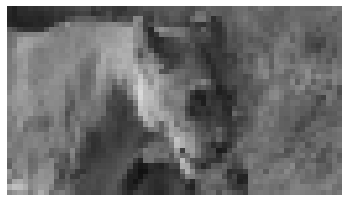

In [11]:
plt.imshow(trial_image.squeeze(), cmap='gray', vmin=0, vmax=255)
plt.axis('off')

The shape of `trial_response` is simply the number of neurons

In [12]:
trial_responses.shape

(5335,)

In [13]:
trial_responses.min() # responses are practically always >= 0

-5.409307320414307e-10

In [14]:
trial_responses.max()

53.39189366955226

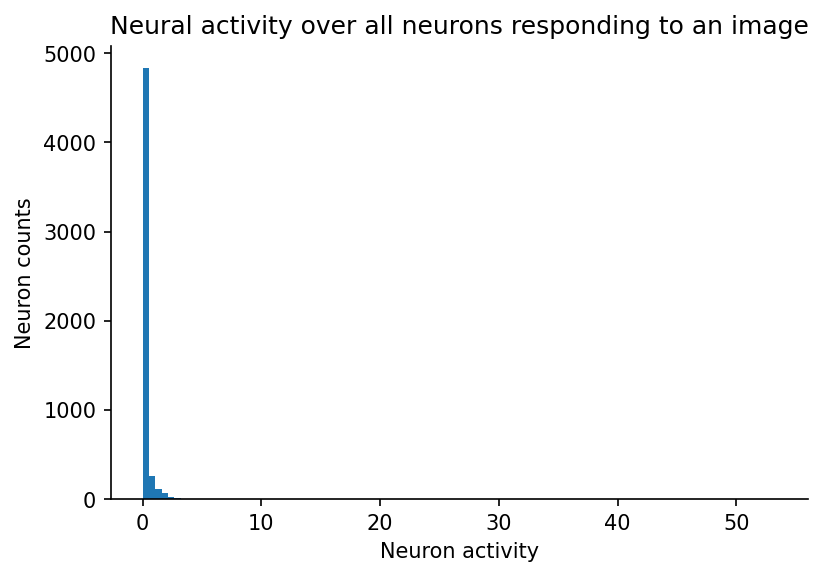

In [15]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.hist(trial_responses, 100);
ax.set_title('Neural activity over all neurons responding to an image')
ax.set_xlabel('Neuron activity')
ax.set_ylabel('Neuron counts')
sns.despine()

You can see most neuron's responses stay very close to 0 - signifying no activity.

### Loading the entire dataset

While we can inspect the image and the corresponding neural population responses one image at a time, this is quite cumbersome and also impractical for use in network training. Fortunately, the `lviv` package provides us with a convenience function that will help to load the entire dataset as PyTorch dataloaders.

In [16]:
from lviv.dataset import load_dataset

As we prepare the dataloaders, we get to specify the batch size.

In [17]:
dataloaders = load_dataset(path = './data/static20457-5-9-preproc0', batch_size=60)

The function returns a dictionary consisting of three dataloaders for training, validation, and test set.

In [18]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fb0a35a31c0>,
 'validation': <torch.utils.data.dataloader.DataLoader at 0x7fb0a35a3a30>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fb0a35a3af0>}

Let's specifically look at the trainset dataloader

In [19]:
train_loader = dataloaders['train']

Total number of images can be checked as follows:

In [20]:
len(train_loader.sampler)

4472

We can inspect what it returns per batch:

In [21]:
images, responses = next(iter(train_loader))

In [22]:
images.shape

torch.Size([60, 1, 36, 64])

In [23]:
responses.shape

torch.Size([60, 5335])

As expected, you can see it returns a batch size of 60 images and responses for all neurons.

Similar inspection can be done on the **validation** and **testing** dataloaders.

In [24]:
# number of images in validation set
len(dataloaders['validation'].sampler)

522

In [25]:
# number of images in test set
len(dataloaders['test'].sampler)

999

You might think that we have a lot of images in test set, but this is because test set consists of repeated images.

Some additional trial information can be observed by accessing the underlying PyTorch dataset object and looking at the `trial_info`. Note that this is not part of the standard PyTorch dataset/dataloader interface, but rather a feature specifically provided by our `lviv` library!

In [26]:
# Access to the dataset object that underlies all dataloaders
dataset = dataloaders['test'].dataset

In [27]:
# get trials that are marked as "test" set
test_trials = np.where(dataset.trial_info.tiers == 'test')[0]

In [28]:
# get information about the presented image for ALL trials
image_ids = dataset.trial_info.frame_image_id

In [29]:
# find IDs of all unique images presented during test trials
unique_test_images = np.unique(image_ids[test_trials])
unique_test_images

array([ 104,  128,  183,  355,  479,  483,  656,  803,  830,  936, 1201,
       1494, 1596, 1652, 1656, 1682, 1731, 1756, 1796, 2005, 2008, 2014,
       2159, 2214, 2389, 2586, 2710, 2746, 2747, 2803, 2816, 2825, 2954,
       3018, 3107, 3144, 3163, 3372, 3427, 3438, 3487, 3507, 3562, 3702,
       3847, 3924, 4231, 4295, 4373, 4397, 4400, 4430, 4594, 4619, 4667,
       4674, 4717, 4739, 4782, 4812, 4814, 4821, 4923, 4953, 5034, 5128,
       5166, 5225, 5264, 5288, 5322, 5334, 5399, 5402, 5504, 5640, 5671,
       5679, 5754, 5782, 6013, 6034, 6066, 6082, 6205, 6238, 6248, 6490,
       6562, 6773, 6790, 6831, 6886, 7017, 7028, 7107, 7119, 7120, 7154,
       7495])

In [30]:
len(unique_test_images)

100

We can see that the test set consists of 100 unique images, each repeated up to 10 times.

Let's now take a look at how a neuron responds to these repeated presentations of an identical image.

In [31]:
from tqdm import tqdm
# gather the responses to the repeated image presentations
repeated_image_responses = []
for unique_test_image_id in tqdm(unique_test_images):
    repeated_image_trials = test_trials[image_ids[test_trials] == unique_test_image_id]
    responses = np.stack([dataset[trial][1].cpu().numpy() for trial in repeated_image_trials])
    repeated_image_responses.append((unique_test_image_id, responses))

100%|██████████| 100/100 [00:01<00:00, 86.03it/s]


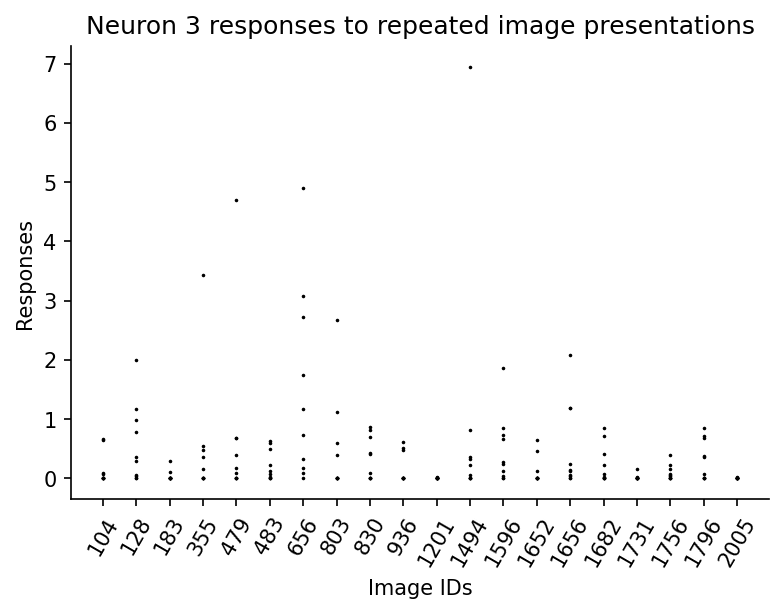

In [32]:
neuron_idx = 3 # choose one neuron to inspect its responses

fig, ax = plt.subplots(1, 1, dpi=150)
labels = []
for i, (image_id, responses) in enumerate(repeated_image_responses[:20]):
    ax.scatter(np.ones(len(responses)) * i, responses[:, neuron_idx], c='k', s=0.5)
    labels.append(image_id)

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=60)
ax.set_title(f'Neuron {neuron_idx} responses to repeated image presentations')
ax.set_xlabel('Image IDs')
ax.set_ylabel('Responses')
sns.despine()

You can see that indeed a single neuron's responses vary widely even to repeated presentations of an identical stimulus! This **noiseness** of neural responses make predicting the respones of the neurons to images fundamentally challenging and also esssentially make it impossible to yield a perfect fit! Instead, we would often try to fit the **distribution of responses** the best we can, and we will briefly visit this point later.

# Modeling the neuronal responses

Now that we have successfully loaded the dataset and inspected its contents, it's time for us to start **modeling** the responses.

We will start by building a very basic **Linear-Nonlinear model** - which is nothing more than a shallow neural network with single linear layer followed by an activation function.

## Linear-Nonlinear (LN) model

### Background

Arguably one of the simplest models of a neuron's response to a stimulus is the **linear-nonlinear (LN) model**. 

Given an image $I \in \mathbb{R}^{h\,\times\,w}$ where $h$ and $w$ are the height and the width of the image, respectively, let us collapse the image into a vector $x \in \mathbb{R}^{hw}$.

A single neuron's response $r$ under linear-nonlinear model can then be expressed as:
$$
r = a(\mathbf{w}^\top x + b),
$$
where $\mathbf{w} \in \mathbb{R}^{hw}$ and $b \in \mathbb{R}$ are **weight** and **bias**, and $a:\mathbb{R}\mapsto\mathbb{R}$ is a scalar **activating function**.

We can in fact extend to capture the responses of all $N$ neurons simultaneously as:

$$
\mathbf{r} = a(\mathbf{W} x + \mathbf{b}),
$$
where $\mathbf{r} \in \mathbb{R}^{N}$, $\mathbf{W} \in \mathbb{R}^{N\,\times\,hw}$ and $\mathbf{b} \in \mathbb{R}^{N}$.

Hence, each neuron weighs each pixel of the image according to the weight $\mathbf{w}$ (corresopnds to a row of $\mathbf{W}$) and thus characterizes how much the each neuron "cares" about a specific pixel.

The weight $\mathbf{w}$ can be thought of as a **filter** that's the same size as the image and is overlaid on top of the image to determine what pixel would contribute to the neuron's response. 

This *image filter* is typically referred to as the **receptive field** of the neuron!

The nonlinear activation function $a(\cdot)$ ensures, among other things, that the output of the network stays above 0. In fitting neuronal responses, we tend to use $a(x) = ELU(x) + 1$ where ELU (Exponential Linear Unit) is defined as follows:

$$
    ELU(x) = 
\begin{cases}
    e^x - 1, & x \lt 0 \\
    x,   & x \ge 0
\end{cases}
$$

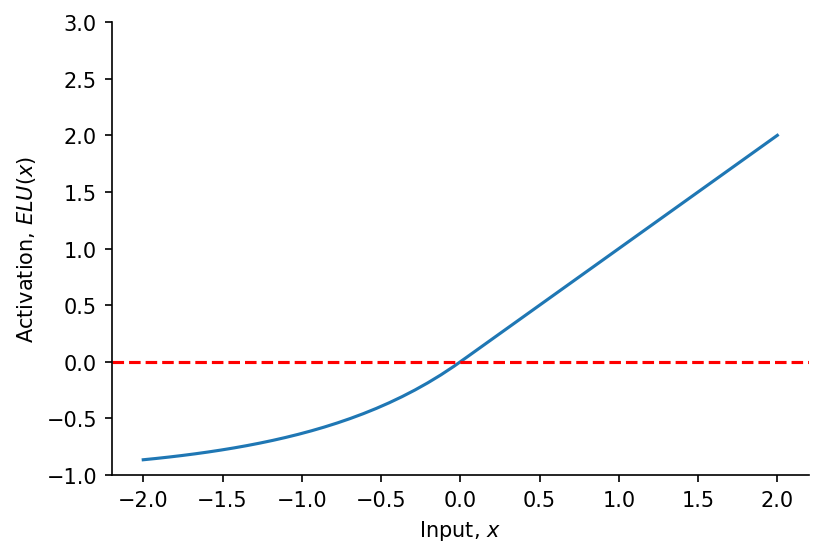

In [33]:
# Plotting ELU function
fig, ax = plt.subplots(1, 1, dpi=150)
x = np.linspace(-2, 2)
ax.plot(x, F.elu(torch.Tensor(x)))
ax.axhline(0, c='r', ls='--')
ax.set_xlabel(r'Input, $x$')
ax.set_ylabel(r'Activation, $ELU(x)$')
ax.set_ylim([-1, 3])
sns.despine()

We shift it by 1 to ensure it will always remain positive.

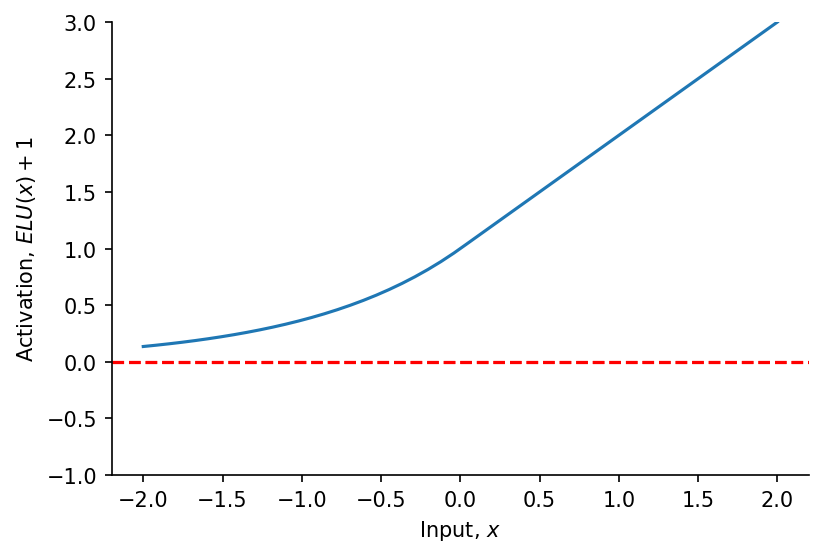

In [34]:
# Plotting ELU+1 function
fig, ax = plt.subplots(1, 1, dpi=150)
x = np.linspace(-2, 2)
ax.plot(x, F.elu(torch.Tensor(x))+1)
ax.axhline(0, c='r', ls='--')
ax.axhline(0, c='r', ls='--')
ax.set_xlabel(r'Input, $x$')
ax.set_ylabel(r'Activation, $ELU(x) + 1$')
ax.set_ylim([-1, 3.0])
sns.despine()

Overall, it can be seen that a linear-nonlinear (LN) model is nothing more than a single linear layer applied on a flattened image input, followed by a nonlinear activation function (i.e. $ELU(x)+1$). 

Now let's go ahead and implment our LN model in PyTorch!

### Implementation

We implement a simple network consisting of a linear layer followed by ELU + 1 activation

In [35]:
class Linear(nn.Module):
    def __init__(
        self,
        input_height,
        input_width,
        n_neurons,
        momentum=0.1,
        init_std=1e-3,
        gamma=0.0,
    ):
        super().__init__()
        self.bn = nn.BatchNorm2d(1, momentum=momentum, affine=False)
        self.linear = nn.Linear(input_height * input_width, n_neurons)
        self.gamma = gamma
        self.init_std = init_std
        self.initialize()
        
    
    def forward(self, x):
        x = self.bn(x)
        x = self.linear(x.flatten(1))
        return nn.functional.elu(x) + 1
        

    def initialize(self, std=None):
        if std is None:
            std = self.init_std
        nn.init.normal_(self.linear.weight.data, std=std)


    def regularizer(self):
        return self.gamma * self.linear.weight.abs().sum()


And that's it! We have now designed our first model of the neuron's responses!

**BONUS**: notice that we used batch normalization (BN) layer right before the linear layer? This empirically helps to stabilize the training, allowing us to be not too sensitive to the weight and bias initialization. You could implement and train a LN network without such BN layer and you are encouraged to try! However if you do, be wary of the network weight initializations and the choice of learning rate during the training.

### Training the network

Now that we have a candidate model designed, it's time to train it. While we could use a standard set of optimizers as provided by PyTorch to implement our training routine, here, we are provided with a convenience function `train_model` that would handle a lot of the training boilerplate.

In [36]:
from lviv.trainers import train_model

Critically, `train_model` sets up the training based on **Poisson loss** and also perform early stopping based on **correlation** of the predicted neuronal responses with the actual neuronal responses on the **validation set**. Let's now talk briefly about our objective (loss) function of choice in training neuron response models - the Poisson loss.

### Mathematical aside: Poisson Loss

#### How we are **actually** modeling the noisy neuronal responses

The use of **Poisson loss** follows from the assumption that, *conditioned on the stimulus*, the neurons' responses follow an **independent Poisson** distribution. That is, given an input image $x$, the population response $\mathbf{r}$ is distributed as:

$$
p(\mathbf{r} | x) = \prod_i^N \text{Poiss}(r_i; \lambda_i(x))
$$

where $r_i$ is the $i^\text{th}$ neuron in the population $\mathbf{r}$. The $\lambda_i$ is the parameter for Poisson distribution that controls its **average value**. Here we express $\lambda_i(x)$ to indicate the fact that the average response for each neuron is expected to vary *as a function of the input image*. We can express this average matching as:

$$
\mathbb{E}[r_i|x] = \lambda_i(x)
$$

In fact, it is precisely this function $\lambda_i(x)$ that we are modeling using LN models and, in the next step, more complex neural networks. In otherwords, we are learning $\lambda_i(x) = f_i(x, \theta)$, where $\theta$ is the trainable parameters of the model.

Putting all together, this means that, our model $f(x, \theta)$ is really modeling the average activity of the neurons,

$$
\mathbb{E}[\mathbf{r}|x] = \mathbf{f}(x, \theta)
$$

while we are assuming that the neurons are distributed according to **independent Poisson** distribution around the average responses predicted by our model $\mathbf{f}(x, \theta)$.

#### Deriving the objective function

Poisson distribution is defined as follows:

$$
p(r) = \text{Poiss}(r; \lambda) = \frac{e^{-\lambda}\lambda^{r}}{r!}
$$

During the training, we would want to adjust the model parameter $\theta$ to maximize the chance of observing the response $\mathbf{r}$ to a known image $x$. This is achieved by **maximizing** the log-likelihood function $\log p(\mathbf{r}|x, \theta)$, or equivalently by **minimzing the negative log-likelihood function** as the objective function $L(x, \mathbf{r}, \theta)$:

$$
\begin{align}
L(x, \mathbf{r}, \theta) &= -\log p(\mathbf{r}|x, \theta) \\
&= -\log \prod_i \text{Poiss}(r_i; f_i(x, \theta)) \\
&= -\sum_i \log \frac{e^{-f_i(x, \theta)}f_i(x, \theta)^{r_i}}{r_i!} \\
&= \sum_i \left(f_i(x, \theta) - r_i \log f_i(x, \theta) + \log r_i! \right)
\end{align}
$$


During the optimization, we seek for $\theta$ that would minimize the loss $L$. Note that since the term $\log r_i!$ does not depend on $\theta$, it can be safely dropped from Poisson loss. Hence you would commonly see the following expression as the definition of the **Poisson loss**

$$
L_\text{Poiss}(x, \mathbf{r}, \theta) = \sum_i \left(f_i(x, \theta) - r_i \log f_i(x, \theta)\right)
$$

### Performing the training

Now that we have the theoretical foundation for the training and the choice of the objective function under our belt, let's go ahead and train the network. Because the function `train_model` handles a lot underneath the hood, training a model is just as easy as invoking the function by passing it the model to be trained and the dataloaders!

First of all, let's instantiate the model to train.

In [37]:
ln_model = Linear(input_height=64, input_width=36, n_neurons=5335, gamma=0.1)

In [38]:
from lviv.trainers import train_model

In [39]:
score, output, model_state = train_model(model=ln_model, dataloader=dataloaders)

correlation -0.0005068796
poisson_loss 9315178.0


Epoch 1: 100%|██████████| 75/75 [00:05<00:00, 12.60it/s]

[001|00/05] ---> 0.0755399689078331


correlation 0.07553997
poisson_loss 3160724.2


Epoch 2: 100%|██████████| 75/75 [00:01<00:00, 51.74it/s]


[002|01/05] -/-> 0.06807053834199905
correlation 0.06807054
poisson_loss 2929502.0


Epoch 3: 100%|██████████| 75/75 [00:01<00:00, 51.93it/s]


[003|01/05] ---> 0.07690655440092087
correlation 0.076906554
poisson_loss 2680269.0


Epoch 4: 100%|██████████| 75/75 [00:01<00:00, 52.33it/s]


[004|00/05] ---> 0.07844682037830353
correlation 0.07844682
poisson_loss 2609186.2


Epoch 5: 100%|██████████| 75/75 [00:01<00:00, 52.23it/s]


[005|00/05] ---> 0.09050465375185013
correlation 0.090504654
poisson_loss 2610619.8


Epoch 6: 100%|██████████| 75/75 [00:01<00:00, 49.77it/s]


[006|01/05] -/-> 0.08536671102046967
correlation 0.08536671
poisson_loss 2512817.5


Epoch 7: 100%|██████████| 75/75 [00:01<00:00, 51.85it/s]


[007|02/05] -/-> 0.08594295382499695
correlation 0.085942954
poisson_loss 2622687.0


Epoch 8: 100%|██████████| 75/75 [00:01<00:00, 51.87it/s]


[008|03/05] -/-> 0.0835261344909668
correlation 0.083526134
poisson_loss 2577994.2


Epoch 9: 100%|██████████| 75/75 [00:01<00:00, 52.34it/s]


[009|04/05] -/-> 0.08810349553823471
correlation 0.088103496
poisson_loss 2605849.5


Epoch 10: 100%|██████████| 75/75 [00:01<00:00, 52.28it/s]


[010|05/05] -/-> 0.08274558186531067
Restoring best model after lr decay! 0.082746 ---> 0.090505
correlation 0.090504654
poisson_loss 2610619.8


Epoch 11: 100%|██████████| 75/75 [00:01<00:00, 51.55it/s]


Epoch    11: reducing learning rate of group 0 to 1.5000e-03.
[011|01/05] -/-> 0.07468592375516891
correlation 0.074685924
poisson_loss 2685291.5


Epoch 12: 100%|██████████| 75/75 [00:01<00:00, 51.43it/s]


[012|01/05] ---> 0.1142207458615303
correlation 0.114220746
poisson_loss 2119328.0


Epoch 13: 100%|██████████| 75/75 [00:01<00:00, 52.35it/s]


[013|01/05] -/-> 0.11164650321006775
correlation 0.1116465
poisson_loss 2139428.0


Epoch 14: 100%|██████████| 75/75 [00:01<00:00, 51.47it/s]


[014|02/05] -/-> 0.11172172427177429
correlation 0.111721724
poisson_loss 2133041.5


Epoch 15: 100%|██████████| 75/75 [00:01<00:00, 51.92it/s]


[015|03/05] -/-> 0.11026743054389954
correlation 0.11026743
poisson_loss 2130532.5


Epoch 16: 100%|██████████| 75/75 [00:01<00:00, 51.87it/s]


[016|04/05] -/-> 0.11052830517292023
correlation 0.110528305
poisson_loss 2129618.5


Epoch 17: 100%|██████████| 75/75 [00:01<00:00, 52.02it/s]


[017|05/05] -/-> 0.11232776194810867
Restoring best model after lr decay! 0.112328 ---> 0.114221
correlation 0.114220746
poisson_loss 2119328.0


Epoch 18: 100%|██████████| 75/75 [00:01<00:00, 51.97it/s]


Epoch    18: reducing learning rate of group 0 to 4.5000e-04.
[018|01/05] -/-> 0.11210498213768005
correlation 0.11210498
poisson_loss 2149323.5


Epoch 19: 100%|██████████| 75/75 [00:01<00:00, 52.22it/s]


[019|01/05] ---> 0.11877766251564026
correlation 0.11877766
poisson_loss 2059207.5


Epoch 20: 100%|██████████| 75/75 [00:01<00:00, 52.01it/s]


[020|00/05] ---> 0.12049273401498795
correlation 0.120492734
poisson_loss 2059728.1


Epoch 21: 100%|██████████| 75/75 [00:01<00:00, 51.54it/s]


[021|01/05] -/-> 0.12043541669845581
correlation 0.12043542
poisson_loss 2053844.1


Epoch 22: 100%|██████████| 75/75 [00:01<00:00, 51.29it/s]


[022|01/05] ---> 0.12065974622964859
correlation 0.120659746
poisson_loss 2061170.2


Epoch 23: 100%|██████████| 75/75 [00:01<00:00, 51.54it/s]


[023|01/05] -/-> 0.11951012909412384
correlation 0.11951013
poisson_loss 2057843.0


Epoch 24: 100%|██████████| 75/75 [00:01<00:00, 52.40it/s]


[024|02/05] -/-> 0.11911389976739883
correlation 0.1191139
poisson_loss 2053959.4


Epoch 25: 100%|██████████| 75/75 [00:01<00:00, 51.61it/s]


[025|03/05] -/-> 0.11822938919067383
correlation 0.11822939
poisson_loss 2062295.0


Epoch 26: 100%|██████████| 75/75 [00:01<00:00, 52.26it/s]


[026|04/05] -/-> 0.116488516330719
correlation 0.11648852
poisson_loss 2070184.5


Epoch 27: 100%|██████████| 75/75 [00:01<00:00, 51.75it/s]


[027|05/05] -/-> 0.12015976756811142
Restoring best model after lr decay! 0.120160 ---> 0.120660
Restoring best model! 0.120660 ---> 0.120660


### Analyzing the trained network

Woohoo! We have now successfully trained our very first LN model on real neuronal responses! But really, how good is the model?

During the training, the `train_model` function iteratively reported two values: the loss function (Poisson loss) value and the average correlation. 

But what is this correlation? It's simply the correlation computed between our predicted neuronal responses $\hat{r}_i$ and the actual neuronal responses $r_i$ across images in the validation set. We then take the average correlation value **across neurons** to get average correlation.

Being a correlation, the highest possible value is of course 1.0. Practically speaking, this is never reached both due to 1) imperfection of our model and more fundamentally due to 2) the noiseness of the neuron's responses. Because of the noise, even a perfect model would never reach a correlation of 1.0.

Let's actually go ahead and look at the model's predicted responses on the test set and compare them against the actual responses. The package `lviv` provides for a convenient function to quickly gather the model's responses and the actual responses.

In [46]:
from lviv.utility import measures
from scipy.stats import pearsonr

actual_responses, model_responses = measures.model_predictions(ln_model, dataloaders['test'], device='cuda')

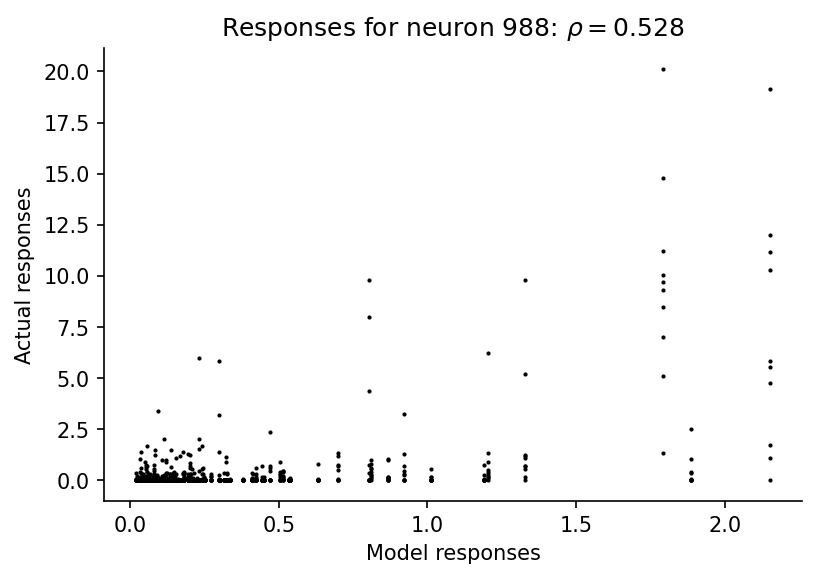

In [47]:
# pick a neuron to generate the plot for
neuron_idx = 988

# compute Pearson correlation
r, _ = pearsonr(model_responses[:, neuron_idx], actual_responses[:, neuron_idx])
fig, ax = plt.subplots(1, 1, dpi=150)
ax.scatter(model_responses[:, neuron_idx], actual_responses[:, neuron_idx], c='k', s=1.0)
ax.set_title(f'Responses for neuron {neuron_idx}: $\\rho = {r:.3f}$')
ax.set_xlabel('Model responses')
ax.set_ylabel('Actual responses')
sns.despine()

Let's take a look at how this correlation is distributed across neurons. This time, we'll use `get_gorrelations` function to compute correation for all neurons quickly.

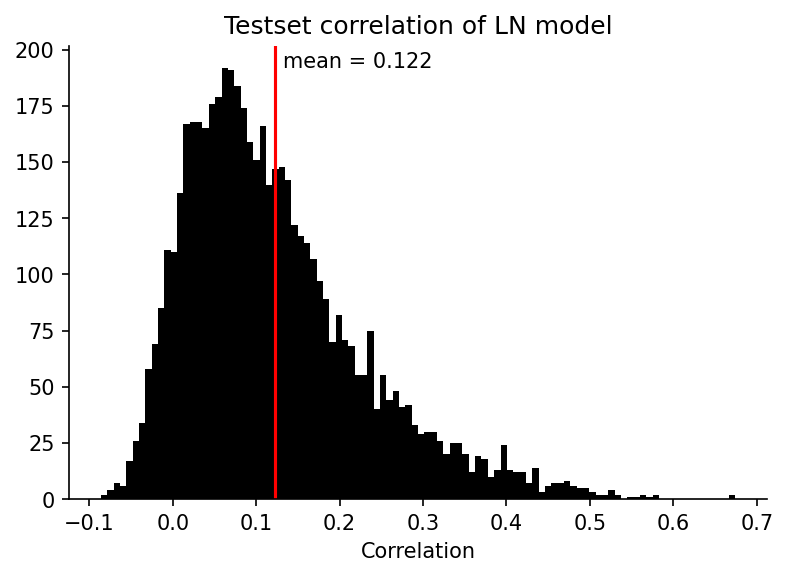

In [48]:
# compute correlation on test set
ln_test_correlations = measures.get_correlations(
    ln_model, dataloaders["test"], device="cuda", per_neuron=True
)

fig, ax = plt.subplots(1, 1, dpi=150)
n, bins, _ = ax.hist(ln_test_correlations, bins=100, color='k')
mean_corr = np.mean(ln_test_correlations)
ax.axvline(mean_corr, color="r")
ax.text(
    x=mean_corr + 0.01,
    y=np.max(n),
    s="mean = {:.3f}".format(mean_corr),
)
ax.set_title('Testset correlation of LN model')
ax.set_xlabel('Correlation')
sns.despine()

You can see that value of achieved correlation on the test set widely varies among the neurons. Some neurons are quite well predicted, reaching correlation above 0.6, where as many neurons have correlation well below 0.1.

## Going beyond Linear-Nonlinear model by using CNN

We saw that a simple LN model can be trained to achieve above chance performance in predicting the responses of mouse V1 neurons to natural images. But we certainly must be able to do better than that, right?

In the past decase, what has really driven system identification of visual neurons has been the use of convolutional neural networks (CNN). Below, we will try out a very simple CNN to see if we can already reach better performance than LN.

In [49]:
from collections import OrderedDict
class CNN(nn.Module):
    def __init__(
        self,
        input_height,
        input_width,
        n_neurons,
        momentum=0.1,
        init_std=1e-3,
        gamma=0.1,
        hidden_channels=8,
    ):
        super(CNN, self).__init__()
        self.init_std = init_std
        self.gamma = gamma

        # CNN core
        self.cnn_core = nn.Sequential(
            OrderedDict(
                [
                    ("conv1", nn.Conv2d(1, hidden_channels, 15, padding=15 // 2, bias=False)),
                    ("bn1", nn.BatchNorm2d(hidden_channels, momentum=momentum)),
                    ("elu1", nn.ELU()),
                    ("conv2", nn.Conv2d(hidden_channels, hidden_channels, 13, padding=13 // 2, bias=False)),
                    ("bn2", nn.BatchNorm2d(hidden_channels, momentum=momentum)),
                    ("elu2", nn.ELU()),
                    ("conv3", nn.Conv2d(hidden_channels, hidden_channels, 13, padding=13 // 2, bias=False)),
                    ("bn3", nn.BatchNorm2d(hidden_channels, momentum=momentum)),
                    ("elu3", nn.ELU()),
                    ("conv4", nn.Conv2d(hidden_channels, hidden_channels, 13, padding=13 // 2, bias=False)),
                    ("bn4", nn.BatchNorm2d(hidden_channels, momentum=momentum)),
                    ("elu4", nn.ELU()),
                ]
            )
        )

        # Fully connected readout
        self.readout = nn.Sequential(
            OrderedDict(
                [
                    ('fc_ro', nn.Linear(input_height * input_width * hidden_channels, n_neurons)),
                    ('bn_ro', nn.BatchNorm1d(n_neurons, momentum=momentum)),
                ]
            )
        )


    def initialize(self, std=None):
        if std is None:
            std = self.init_std
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.normal_(m.weight.data, std=std)

    def forward(self, x):
        x = self.cnn_core(x)
        x = x.view(x.size(0), -1)
        x = self.readout(x)
        return nn.functional.elu(x) + 1
    
    def regularizer(self):
        return self.readout[0].weight.abs().sum() * self.gamma


Let us now instantiate the model and train it!

In [50]:
cnn_model = CNN(input_height=64, input_width=36, n_neurons=5335)

In [45]:
score, output, model_state = train_model(model=cnn_model, dataloader=dataloaders)

correlation 0.0004398354
poisson_loss 3525886.8


Epoch 1: 100%|██████████| 75/75 [00:11<00:00,  6.78it/s]


[001|00/05] ---> 0.04930970072746277
correlation 0.0493097
poisson_loss 2432592.5


Epoch 2: 100%|██████████| 75/75 [00:11<00:00,  6.77it/s]


[002|00/05] ---> 0.11282610893249512
correlation 0.11282611
poisson_loss 2077027.2


Epoch 3: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[003|00/05] ---> 0.14052461087703705
correlation 0.14052461
poisson_loss 1938169.2


Epoch 4: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[004|00/05] ---> 0.15958307683467865
correlation 0.15958308
poisson_loss 1881313.2


Epoch 5: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]


[005|00/05] ---> 0.1728663444519043
correlation 0.17286634
poisson_loss 1842070.2


Epoch 6: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]


[006|00/05] ---> 0.1903487741947174
correlation 0.19034877
poisson_loss 1816162.0


Epoch 7: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]


[007|00/05] ---> 0.2010522037744522
correlation 0.2010522
poisson_loss 1798156.9


Epoch 8: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]


[008|00/05] ---> 0.21099317073822021
correlation 0.21099317
poisson_loss 1792720.8


Epoch 9: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]


[009|01/05] -/-> 0.208628848195076
correlation 0.20862885
poisson_loss 1798003.8


Epoch 10: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[010|02/05] -/-> 0.200898677110672
correlation 0.20089868
poisson_loss 1824730.0


Epoch 11: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]


[011|03/05] -/-> 0.20505844056606293
correlation 0.20505844
poisson_loss 1839536.9


Epoch 12: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]


[012|04/05] -/-> 0.1954370141029358
correlation 0.19543701
poisson_loss 1865039.9


Epoch 13: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[013|05/05] -/-> 0.18835215270519257
Restoring best model after lr decay! 0.188352 ---> 0.210993
correlation 0.21099317
poisson_loss 1792720.8


Epoch 14: 100%|██████████| 75/75 [00:11<00:00,  6.76it/s]


Epoch    14: reducing learning rate of group 0 to 1.5000e-03.
[014|01/05] -/-> 0.2059522271156311
correlation 0.20595223
poisson_loss 1811793.8


Epoch 15: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[015|02/05] -/-> 0.20673702657222748
correlation 0.20673703
poisson_loss 1800456.2


Epoch 16: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[016|03/05] -/-> 0.20406024158000946
correlation 0.20406024
poisson_loss 1811234.6


Epoch 17: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[017|04/05] -/-> 0.1975199282169342
correlation 0.19751993
poisson_loss 1825190.2


Epoch 18: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]


[018|05/05] -/-> 0.19415631890296936
Restoring best model after lr decay! 0.194156 ---> 0.210993
correlation 0.21099317
poisson_loss 1792720.8


Epoch 19: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[019|01/05] -/-> 0.20397420227527618
correlation 0.2039742
poisson_loss 1799840.0


Epoch 20: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


Epoch    20: reducing learning rate of group 0 to 4.5000e-04.
[020|02/05] -/-> 0.2054654061794281
correlation 0.2054654
poisson_loss 1804453.6


Epoch 21: 100%|██████████| 75/75 [00:11<00:00,  6.75it/s]


[021|03/05] -/-> 0.20186130702495575
correlation 0.2018613
poisson_loss 1806262.8


Epoch 22: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]


[022|04/05] -/-> 0.20183435082435608
correlation 0.20183435
poisson_loss 1809173.5


Epoch 23: 100%|██████████| 75/75 [00:11<00:00,  6.74it/s]


[023|05/05] -/-> 0.19742700457572937
Restoring best model after lr decay! 0.197427 ---> 0.210993
Restoring best model! 0.210993 ---> 0.210993


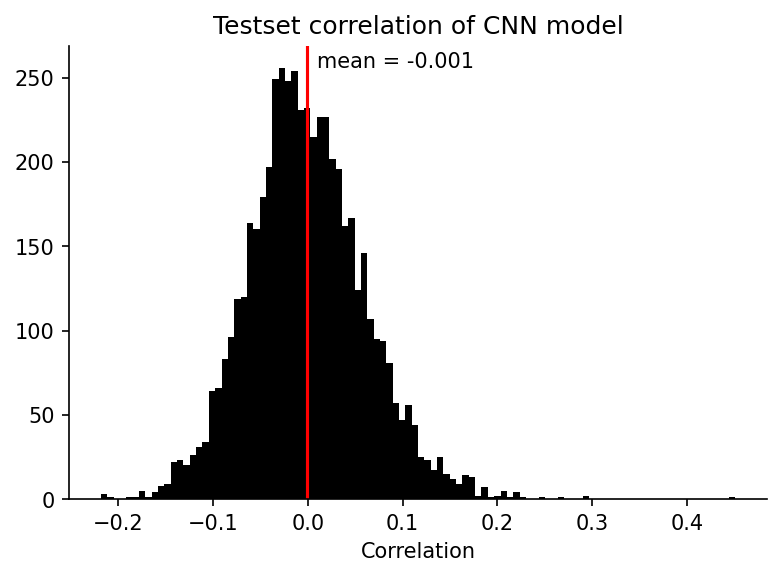

In [51]:
# compute correlation on test set
cnn_test_correlations = measures.get_correlations(
    cnn_model, dataloaders["test"], device="cuda", per_neuron=True
)

fig, ax = plt.subplots(1, 1, dpi=150)
n, bins, _ = ax.hist(cnn_test_correlations, bins=100, color='k')
mean_corr = np.mean(cnn_test_correlations)
ax.axvline(mean_corr, color="r")
ax.text(
    x=mean_corr + 0.01,
    y=np.max(n),
    s="mean = {:.3f}".format(mean_corr),
)
ax.set_title('Testset correlation of CNN model')
ax.set_xlabel('Correlation')
sns.despine()

So on average, it seems to do better than our simple LN model. Let's compare the performance for each neuron between the two models.

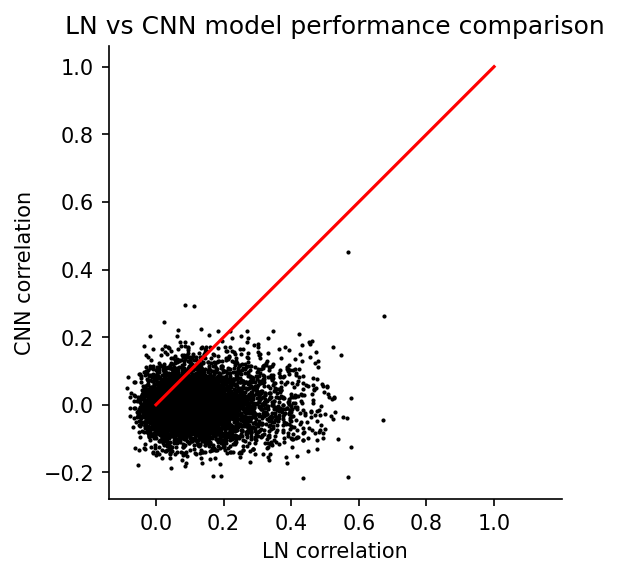

In [52]:
# compare model performance
fig, ax = plt.subplots(1, 1, dpi=150)
ax.scatter(ln_test_correlations, cnn_test_correlations, color="k", s=1)
ax.set_xlabel('LN correlation')
ax.set_ylabel('CNN correlation')
ax.set_title('LN vs CNN model performance comparison')
ax.plot([0, 1], [0, 1], color='r')
ax.axis('square')
sns.despine()

Here each dot corresponds to a single neuron, plotting the LN vs CNN model's performance in predicting that neuron's responses. Red diagonal establishes the equal performance line.

You can appreciate that for vast majority of neurons (each black point), the CNN model yields better predictive performance than the LN model.

## Trying out the State-of-the-Art (SOTA) model

Now that we got some sense on how we could go about training linear and nonlinear network models to predict V1 neuron responses to natural images, and we just saw how using a CNN model brings significant improvement to the performance beyond the LN model.

You might now be wondering, how good can we get? To get a sense of this, let's go ahead and train a state-of-the-art (SOTA) CNN model for mouse V1 responses to natual images as published in our recent work in [Lurz et al. ICLR 2021](https://github.com/sinzlab/Lurz_2020_code).

To keep things simple, I have provided for the network implementation in the `lviv` package, so you can build the model just by invoking a function!

In [53]:
from lviv.models import build_lurz2020_model
model_config = {'init_mu_range': 0.55,
                'init_sigma': 0.4,
                'input_kern': 15,
                'hidden_kern': 13,
                'gamma_input': 1.0,
                'grid_mean_predictor': {'type': 'cortex',
                                        'input_dimensions': 2,
                                        'hidden_layers': 0,
                                        'hidden_features': 0,
                                        'final_tanh': False},
                'gamma_readout': 2.439
               }

sota_cnn_model = build_lurz2020_model(**model_config, dataloaders=dataloaders, seed=1234)

In [54]:
# Uncomment this line to train the network instead
#score, output, model_state = train_model(model=sota_cnn_model, dataloader=dataloaders)

state_dict = torch.load("./trained_nets/sota_cnn_model_state.pt")
sota_cnn_model.load_state_dict(state_dict)

<All keys matched successfully>

As usual, let's take a look at the testset performance.

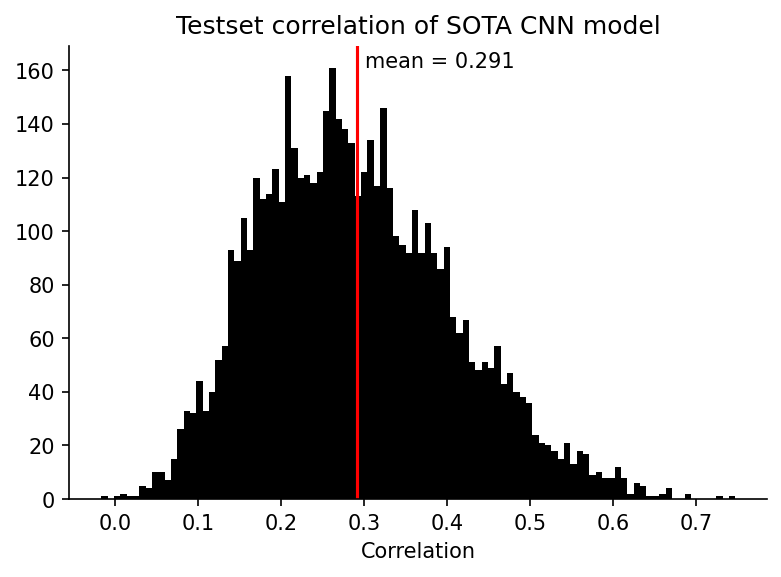

In [55]:
# compute correlation on test set
sota_cnn_test_correlations = measures.get_correlations(
    sota_cnn_model, dataloaders["test"], device="cuda", per_neuron=True
)

fig, ax = plt.subplots(1, 1, dpi=150)
n, bins, _ = ax.hist(sota_cnn_test_correlations, bins=100, color='k')
mean_corr = np.mean(sota_cnn_test_correlations)
ax.axvline(mean_corr, color="r")
ax.text(
    x=mean_corr + 0.01,
    y=np.max(n),
    s="mean = {:.3f}".format(mean_corr),
)
ax.set_title('Testset correlation of SOTA CNN model')
ax.set_xlabel('Correlation')
sns.despine()

It turns out that we can have *linearized* version of the SOTA model. This effectively removes all nonlinear operations within the network except for the very last nonlinear activation, rendering the network into a **LN model** but with more complex architecture.

In [56]:
linear_model_config = dict(model_config) # copy the config
linear_model_config['linear'] = True # set linear to True to make it a LN model!

sota_ln_model = build_lurz2020_model(**linear_model_config, dataloaders=dataloaders, seed=1234)

In [57]:
# Uncomment this line to train the network instead
#score, output, model_state = train_model(model=sota_ln_model, dataloader=dataloaders)

state_dict = torch.load("./trained_nets/sota_ln_model_state.pt")
sota_ln_model.load_state_dict(state_dict)

<All keys matched successfully>

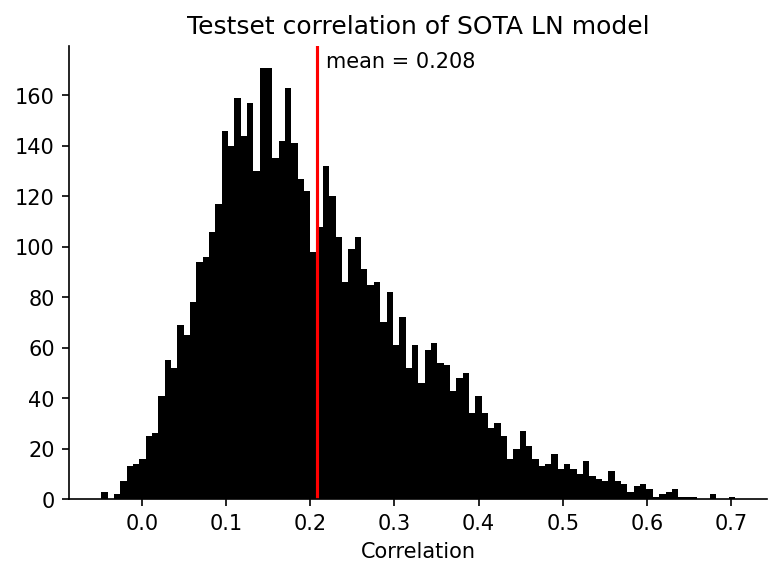

In [58]:
# compute correlation on test set
sota_ln_test_correlations = measures.get_correlations(
    sota_ln_model, dataloaders["test"], device="cuda", per_neuron=True
)

fig, ax = plt.subplots(1, 1, dpi=150)
n, bins, _ = ax.hist(sota_ln_test_correlations, bins=100, color='k')
mean_corr = np.mean(sota_ln_test_correlations)
ax.axvline(mean_corr, color="r")
ax.text(
    x=mean_corr + 0.01,
    y=np.max(n),
    s="mean = {:.3f}".format(mean_corr),
)
ax.set_title('Testset correlation of SOTA LN model')
ax.set_xlabel('Correlation')
sns.despine()

Interestingly, you can see that compared to our simple LN model, the SOTA LN model actually attains much better performance. This, among other things, reflects the **ease of training** the CNN based network compared to our *fully-connected* simple linear model. Despite the architectural complexity of the SOTA LN model, it is still a LN model as was described mathematically as:

$$
\mathbf{r} = a(\mathbf{W} x + \mathbf{b})
$$

### Compare model performance between SOTA CNN and SOTA LN model

Just as before, let's compare the performanc of SOTA CNN vs SOTA LN.

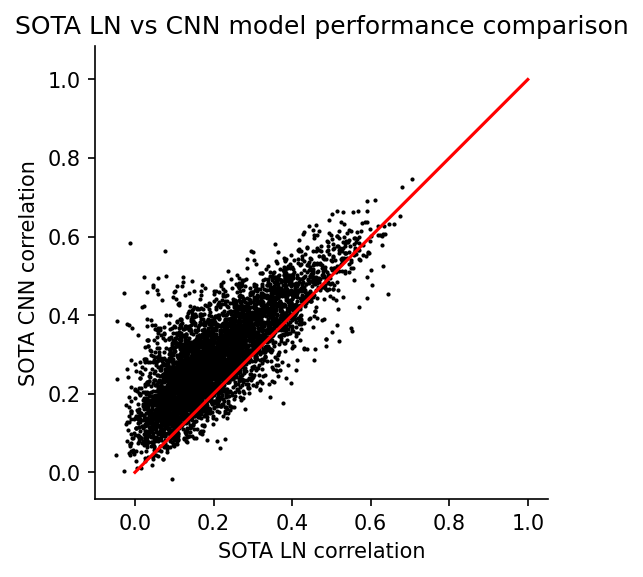

In [59]:
# compare model performance
fig, ax = plt.subplots(1, 1, dpi=150)
ax.scatter(sota_ln_test_correlations, sota_cnn_test_correlations, color="k", s=1)
ax.set_xlabel('SOTA LN correlation')
ax.set_ylabel('SOTA CNN correlation')
ax.set_title('SOTA LN vs CNN model performance comparison')
ax.plot([0, 1], [0, 1], color='r')
ax.axis('square')
sns.despine()

We can see that SOTA CNN model still performs better than the SOTA LN model across most of the neurons.

# Analyzing the trained models to gain insights into the brain

Now that we have trained some models successfully with decent predictive performances, you might be wondering what can we do with these models?

Ideally, we could use these models to gain insights into the modeled neurons, and even potentially derive new predictions that can then be tested with new set of experiments.

Let's first analyze the **gradient receptive field (RF)** of the modeled neurons to get a rough sense of what is it that each neuron is *looking for* in the image when they respond.

## Gradient Receptive Fields (RF)

Let's consider our simple linear-nonlinear (LN) model. Recall from above that for each neuron, the response of the model to an image $x$ can be captured as follows:

$$
r = a(\mathbf{w}^\top x + b)
$$

and I already mentioned that the $\mathbf{w}$ can be thought of as a image filter that selects out pixels that the neuron cares about. This filter is typically referred to as the **receptive field** of the (LN) neuron.

It can actually be seen that we can **compute** the receptive field $\mathbf{w}$ by simply taking the **gradient of the response with respect to the input image**:

$$
\nabla_x r = a^\prime(\mathbf{w}^\top x + b) \cdot \mathbf{w}
$$

You could see that $a^\prime(\mathbf{w}^\top x + b)$ is still a scalar function that will evalute to some scalar value, and therefore,

$$
\nabla_x r \propto \mathbf{w}
$$

Therefore, you can compute the gradient of the model with respect to the input image to get the receptive field $\mathbf{w}$ up to some scalar constant. This method of obtaining the receptive field is commonly referred to as the **gradient receptive field (RF)**.

Note that for LN model, gradient RF correctly approximates the weight $\mathbf{w}$. However when this is applied to more highly nonlinear models like CNNs, the gradient RF can be thought of as giving a locally linear approximation to the CNN model, and still provide some rough insight into what is it that each neuron is looking for when they respond to an image.

Let's now go ahead and compute the gradient RF for our models. We will make use of the PyTorch automatic differentiation system to easily compute the gradient with respect to the image.

**DETAILS**: For LN model, it actually doesn't matter too much *where* you compute the gradient at (that is, what value of input image $x$ you will feed in). However the where can matter quite a bit more when evaluting grad RF for highly nonlinear models such as our CNN model. For this reason, we are going to feed in an *average image* which will be a gray image with intensity set to the average value across all images in the training set. This value has been precomputed and provided as part of the `dataset` that underlies our data loaders.

Let us define a function that, when given a model, neuron index, and the image at which point you want to evaluate the gradient, returns the gradient RF.

In [60]:
def generate_grad_rf(model, neuron_idx, input_image, device="cuda"):
    assert input_image.ndim == 2
    # prepare input image with requires_grad = True so that gradient will be computed
    x = torch.tensor(
        input_image.copy()[None, None, ...],
        dtype=torch.float,
        device=device,
        requires_grad=True,
    )
    # be sure to put the model on eval mode
    model.eval()
    model.to(device)
    # get the response of the target neuron
    model_activation = model(x)[:, neuron_idx]
    # compute gradient with respect to the input
    model_activation.backward()
    
    # prepare the gradient RF
    grad_rf = x.grad.data.cpu().numpy().squeeze()
    return grad_rf

In [61]:
# choose input mean as starting point
input_mean = dataset.statistics.images.all.mean
input_std = dataset.statistics.images.all.std

Let's go ahead and genearte and visualize the grad RF for both our SOTA CNN and SOTA LN models.

In [62]:
# select neuron to compute RFs
neuron_idx = 1

Text(0.5, 0.8, 'Gradient receptive fields')

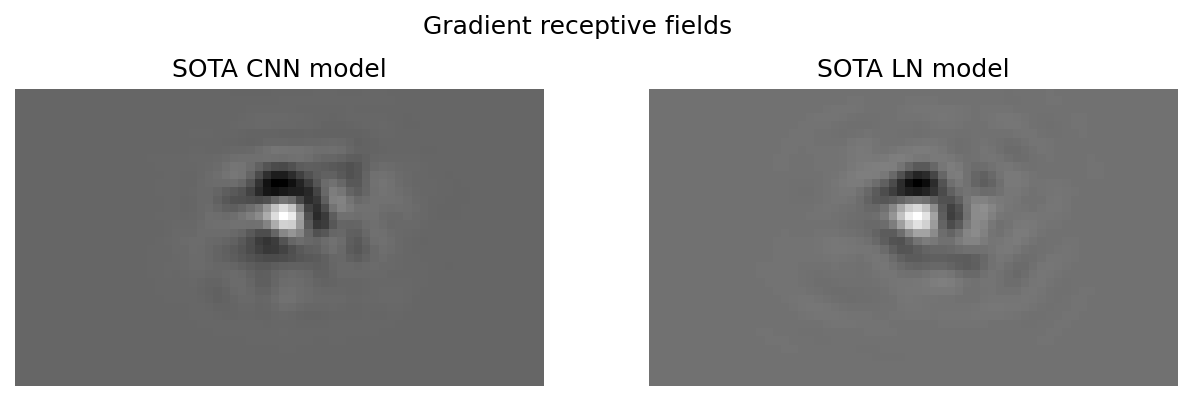

In [63]:
# generate a gradient receptive field from the sota_model and the sota_ln_model
input_image = np.zeros((36, 64)) + input_mean

grad_rf_sota_cnn = generate_grad_rf(
    sota_cnn_model, neuron_idx=neuron_idx, input_image=input_image
)
grad_rf_sota_ln = generate_grad_rf(
    sota_ln_model, neuron_idx=neuron_idx, input_image=input_image
)

# visualize the two gradient RFs side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=150)

scale = np.max([np.max(np.abs(img)) for img in [grad_rf_sota_cnn, grad_rf_sota_ln]])

axes[0].imshow(grad_rf_sota_cnn, cmap="gray")
axes[0].set_title("SOTA CNN model")
axes[0].axis("off")

axes[1].imshow(grad_rf_sota_ln, cmap="gray")
axes[1].set_title("SOTA LN model")
axes[1].axis("off")

fig.suptitle("Gradient receptive fields", y=0.8)

It can be seen that, the gradient RF look grossly similar between the CNN model and LN model.

## Most Exciting Inputs

As we have mentioned above, the gradient RF is a local linear approximation of the CNN model and could vary a lot when computed with different input image. To gain a global insight of the modeled neuron's feature selectivity, we will then analyze their **Most Exciting Inputs (MEIs)**.
As the name implies, the MEIs are the inputs $x$ that maximizes the model responses. To generate the MEI of a targeted neuron $i$, we optimize the model-predicted activation $f_i$ with respect to the input image $x$, yielding:

$$
x_i = \text{argmax}_x f_i(x, \theta)
$$

We will be using the SGD optimizer in PyTorch to solve this optimization problem. Since the optimization algorithms implemented in PyTorch are all designed to minimize the loss function, we use negative model activation as the loss function.

We are working with modeled neurons that do not necessarily have a 'maximal firing rate' unlike the biological neurons, thus it is common to compute the MEIs with certain constraints to ensure $x$ maintains roughly in the input space that the model is trained on. A common approach is to fix the mean and standard deviation of $x$ during optimization at reasonable values. In the following experiment, we fix the mean at the mean of the training set and std at 1/10th of the std of the training set. Feel free to explore MEIs generated with different constraints!

The input image used as the starting point of the optimization in theory should not affect the MEI if the optimization finds the global maximum every time and there exists only one global maximum. To help the SGD algorithm we used in MEI optimization, we chose an input image randomly initiated with a normal distibution. You are encouraged to try out different input images and explore the differences in the resulting MEIs.


In [64]:
from tqdm import tqdm

def generate_mei(
    model,
    input_image,
    neuron_idx,
    iterations,
    mean_constr,
    std_constr,
    lr=1,
    device="cuda",
    disable_progress_bar=False,
):
    assert input_image.ndim == 2
    std_constr = torch.tensor(std_constr).cuda()
    mean_constr = torch.tensor(mean_constr).cuda()

    # be sure to put the model on eval mode
    model.eval()
    model.to(device)
    
    # prepare input image with requires_grad = True so that gradient will be computed
    x = torch.tensor(
        input_image.copy()[None, None, ...],
        dtype=torch.float,
        device=device,
        requires_grad=True,
    )

    optimizer = torch.optim.SGD([x], lr=lr, momentum=0.9)
    model_activations = []
    for i in tqdm(range(iterations), disable=disable_progress_bar):
        # fix the mean and std of the input image
        transformed_x = (x - x.mean()) / (x.std() + 1e-4) * std_constr + mean_constr  # 1e-4 is added to avoid division by zero
        model_activation = model(transformed_x)[:, neuron_idx]
        (-model_activation).backward()
        model_activations.append(model_activation.detach().cpu().numpy())
        optimizer.step()
    # finally, reapply the mean and norm constrain on the image
    x = (x - x.mean()) / (x.std() + 1e-4) * std_constr + mean_constr
    return np.array(model_activations), x.detach().cpu().numpy().squeeze()



Now let's go ahead and genearte the MEIs for both SOTA CNN and SOTA LN models for the same target neuron.

In [65]:
# generate a gradient receptive field from the sota_model and the sota_ln_model
activation_sota_cnn, mei_sota_cnn = generate_mei(
    sota_cnn_model,
    input_image=np.random.normal(input_mean, 0.1, (36, 64)),
    neuron_idx=neuron_idx,
    iterations=2000,
    mean_constr=input_mean,
    std_constr=input_std / 10,
    lr=100,
)

activation_sota_ln, mei_sota_ln = generate_mei(
    sota_ln_model,
    input_image=np.random.normal(input_mean, 0.1, (36, 64)),
    neuron_idx=neuron_idx,
    iterations=2000,
    mean_constr=input_mean,
    std_constr=input_std / 10,
    lr=100,
)


100%|██████████| 2000/2000 [00:15<00:00, 131.87it/s]


...and finally, let's take a look at the MEIs!

Text(0.5, 1.02, 'MEIs')

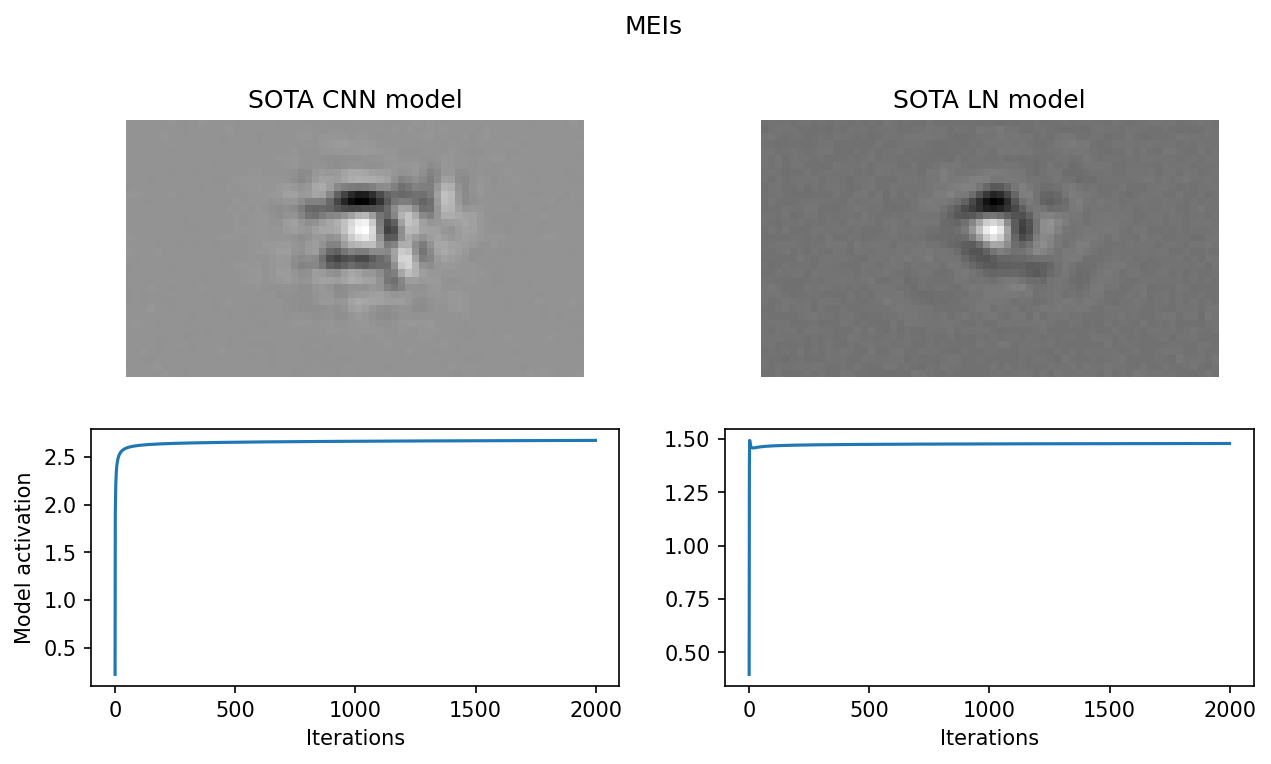

In [66]:
# compare the two meis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), dpi=150)
axes[0,0].imshow(mei_sota_cnn, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('SOTA CNN model')
axes[1,0].plot(activation_sota_cnn)
axes[1,0].set_ylabel('Model activation')
axes[1,0].set_xlabel('Iterations')
axes[0,1].imshow(mei_sota_ln, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('SOTA LN model')
axes[1,1].plot(activation_sota_ln)
axes[1,1].set_xlabel('Iterations')
plt.suptitle('MEIs', y=1.02)

### MEI cross activation

Finally, we check how a neuron's MEI cross-activates other neurons. This will allow us to get a sense of how unique is each MEI, and potnetially find a group of neurons that share similar MEIs. As it takes a long time to generate MEI, he we restrict ourselves to generate 5 MEIs and then compute cross activation.

In [67]:
# pick random 5 neurons
neuron_idx_ls = [1, 48, 1092, 2008, 4029] # randomly selected 5 neurons
meis = []
for i in tqdm(neuron_idx_ls):
    _, mei = generate_mei(
            sota_cnn_model,
            input_image=np.random.normal(input_mean, input_std / 10, (36, 64)),
            neuron_idx=i,
            iterations=2000,
            mean_constr=input_mean,
            std_constr=input_std / 10,
            disable_progress_bar=True,
    )
    meis.append(mei)

meis = torch.tensor(np.stack(meis))[:, None, ...]

100%|██████████| 5/5 [01:16<00:00, 15.26s/it]


Text(0.5, 0, 'Neurons')

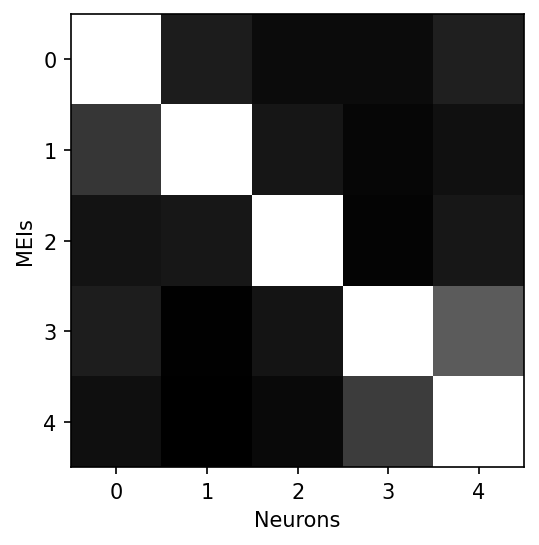

In [68]:
# run MEIs through the network
activations = sota_cnn_model(meis.cuda()).cpu().detach().numpy().squeeze()[:, neuron_idx_ls]

# normalize activation by the heighest activation for each neuron
activations = activations / activations.max(axis=0, keepdims=True)

fig, ax = plt.subplots(1, 1, dpi=150)
ax.imshow(activations, cmap='gray')
ax.set_ylabel('MEIs')
ax.set_xlabel('Neurons')